# Validate PFOS PBK model implementation in Antimony

In [1]:
import re

import pandas as pd
import tellurium as te
import libsbml as ls
import pandas as pd
import seaborn as sns

fn_ant = '../Model/Antimony/PBK_PFOS.ant'
fn_R = '../Results/validation_result.csv'

In [2]:
r = te.loada(fn_ant)
result_ant = r.simulate(0,18750,18750,['age', 'AL', 'VL','PL_PFOS','Aart','Vart_plas','Free_PFOS', 'AG', 'VG','PG_PFOS', 'AR', 'VR', 'PR_PFOS', 'ASk', 'VSk', 'PSk_PFOS',
                                       'BW', 'Inhalation_PFOS','Oraldose_PFOS', 'QC'])

df_result = pd.DataFrame(result_ant, columns = result_ant.colnames)
df_result['Cart'] = (df_result['Aart'] / df_result['Vart_plas']  ) / df_result['Free_PFOS']
df_result['CVL'] = ( df_result['AL'] / df_result['VL'] ) /  df_result['PL_PFOS']
df_result['CVG'] = ( df_result['AG'] / df_result['VG'] ) /  df_result['PG_PFOS']
df_result['CVR'] = ( df_result['AR'] / df_result['VR'] ) /  df_result['PR_PFOS']
df_result['CSk'] = ( df_result['ASk'] / df_result['VSk'] )

df_result

,age,AL,VL,PL_PFOS,Aart,Vart_plas,Free_PFOS,AG,VG,PG_PFOS,...,PSk_PFOS,BW,Inhalation_PFOS,Oraldose_PFOS,QC,Cart,CVL,CVG,CVR,CSk
0,0.000000,0.626729,0.095680,3.72,0.002287,0.061427,0.025,0.063166,0.062928,0.57,...,0.29,3.680000,0.0,0.058680,797.089556,1.489569,1.760824,1.761011,1.171273,0.000000
1,0.002740,0.548329,0.095998,3.72,0.002347,0.061631,0.025,0.055826,0.063137,0.57,...,0.29,3.692247,0.0,0.058680,799.078182,1.523369,1.535445,1.551229,1.518844,0.441046
2,0.005480,0.570757,0.096317,3.72,0.002444,0.061835,0.025,0.058083,0.063347,0.57,...,0.29,3.704492,0.0,0.058680,801.064934,1.580818,1.592965,1.608615,1.576342,0.457718
3,0.008220,0.593120,0.096635,3.72,0.002540,0.062040,0.025,0.060337,0.063556,0.57,...,0.29,3.716735,0.0,0.058680,803.049818,1.637805,1.649928,1.665535,1.633343,0.474252
4,0.010959,0.615470,0.096953,3.72,0.002637,0.062244,0.025,0.062590,0.063766,0.57,...,0.29,3.728978,0.0,0.058680,805.032842,1.694382,1.706479,1.722043,1.689931,0.490665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,51.358904,37.431229,1.835138,3.72,0.161461,1.178159,0.025,3.772468,1.206956,0.57,...,0.29,70.582240,0.0,0.031339,7305.380387,5.481823,5.483052,5.483516,5.481825,1.589729
18746,51.361643,37.431149,1.835120,3.72,0.161461,1.178147,0.025,3.772460,1.206944,0.57,...,0.29,70.581540,0.0,0.031338,7305.326004,5.481866,5.483095,5.483559,5.481867,1.589741
18747,51.364383,37.431069,1.835102,3.72,0.161461,1.178135,0.025,3.772452,1.206932,0.57,...,0.29,70.580839,0.0,0.031338,7305.271622,5.481908,5.483137,5.483602,5.481910,1.589753
18748,51.367123,37.430987,1.835084,3.72,0.161460,1.178124,0.025,3.772404,1.206920,0.57,...,0.29,70.580139,0.0,0.031338,7305.217241,5.481951,5.483180,5.483587,5.481953,1.589766


Antimony outputs amount (due to 'substancelonly'), but we are in fact interested in concentrations. The code block above converts the amounts to concentrations after loading the model. Ideally, however, one would want to have this conversion to be done internally, within the antimony model. I am not sure yet how to do this.

In [3]:
result_R = pd.read_csv(fn_R)
result_R

,Unnamed: 0,time,day,dayoftheweek,month,year,age,BW,SkinTarea,kurine_PFOA,...,CVG_PFOS,CL_PFOS,CVL_PFOS,CF_PFOS,CVF_PFOS,CK_PFOS,CVK_PFOS,Cfil_PFOS,CR_PFOS,CVR_PFOS
0,1,0,1,1,1,1,0.000000,3.680000,2157.227955,0.005198,...,1.711786,6.364967,1.711013,0.238724,1.705172,1.630435,2.038043,0.000069,0.340946,1.704730
1,2,1,2,2,1,1,0.002740,3.692246,2162.006232,0.005194,...,1.787031,6.590521,1.771646,0.244686,1.747755,1.687954,2.109943,0.000071,0.351018,1.755092
2,3,2,3,3,1,1,0.005479,3.704490,2166.778674,0.005190,...,1.841013,6.791524,1.825678,0.252249,1.801782,1.739830,2.174787,0.000073,0.361831,1.809156
3,4,3,4,4,1,1,0.008219,3.716733,2171.545308,0.005186,...,1.894601,6.991029,1.879309,0.259766,1.855472,1.791327,2.239159,0.000075,0.372565,1.862823
4,5,4,5,5,1,1,0.010959,3.728975,2176.306158,0.005181,...,1.947802,7.189095,1.932552,0.267229,1.908776,1.842453,2.303066,0.000077,0.383221,1.916104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18746,18747,18746,18747,1,5,52,51.358904,70.582240,15426.682964,0.002484,...,5.473913,20.361227,5.473448,0.766111,5.472223,5.251924,6.564905,0.000220,1.094444,5.472221
18747,18748,18747,18748,2,5,52,51.361644,70.581540,15426.580992,0.002484,...,5.473959,20.361398,5.473494,0.766118,5.472269,5.251968,6.564960,0.000220,1.094453,5.472267
18748,18749,18748,18749,3,5,52,51.364384,70.580839,15426.479022,0.002484,...,5.474005,20.361569,5.473540,0.766124,5.472315,5.252012,6.565015,0.000220,1.094463,5.472313
18749,18750,18749,18750,4,5,52,51.367123,70.580139,15426.377054,0.002484,...,5.474038,20.361734,5.473585,0.766131,5.472361,5.252056,6.565070,0.000220,1.094472,5.472359


In [4]:
compartments_ant = ['Cart', 'CVL', 'CVG', 'CVR','CSk', 'BW',  'Inhalation_PFOS','Oraldose_PFOS', 'QC'] 
df_ant = pd.melt(df_result, id_vars=['age'], value_vars=compartments_ant, var_name='quantity', value_name='value')
df_ant['src'] = 'ant'

compartments_r = ['Cart_PFOS', 'CVL_PFOS', 'CVG_PFOS', 'CVR_PFOS', 'CSk_PFOS', 'BW',  'Inhalation_PFOS', 'Oraldose_PFOS','QC'] 
result_R = result_R.rename(columns={compartments_r[0] : compartments_ant[0], 
                            compartments_r[1] : compartments_ant[1], 
                            compartments_r[2] : compartments_ant[2], 
                            compartments_r[3] : compartments_ant[3],
                            compartments_r[4] : compartments_ant[4]})
df_r = pd.melt(result_R, id_vars=['age'], value_vars=compartments_ant, var_name='quantity', value_name='value')
df_r['src'] = 'r'

df_all = pd.concat((df_ant, df_r))    
df_all

,age,quantity,value,src
0,0.000000,Cart,1.489569,ant
1,0.002740,Cart,1.523369,ant
2,0.005480,Cart,1.580818,ant
3,0.008220,Cart,1.637805,ant
4,0.010959,Cart,1.694382,ant
...,...,...,...,...
168754,51.358904,QC,7305.380375,r
168755,51.361644,QC,7305.325995,r
168756,51.364384,QC,7305.271616,r
168757,51.367123,QC,7305.217238,r


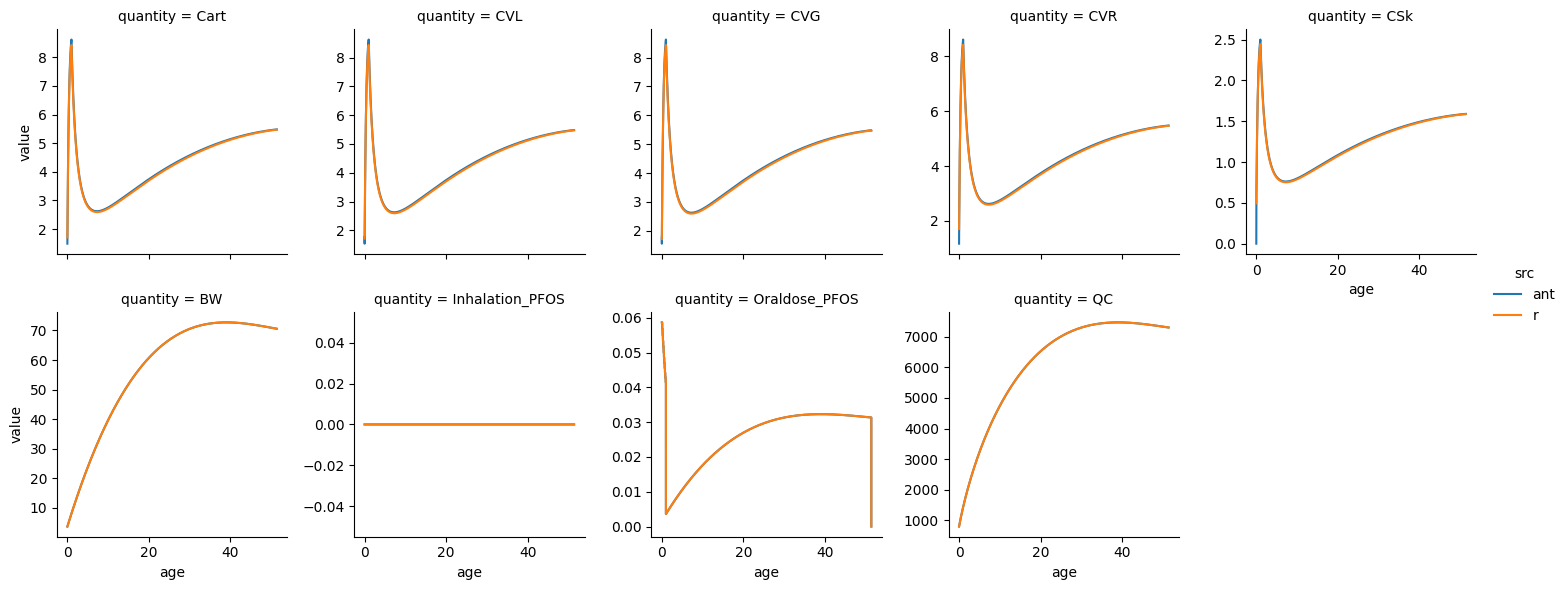

In [5]:
g = sns.FacetGrid(df_all, col='quantity', hue='src', col_wrap=5, sharey=False,
                 col_order=compartments_ant)
g.map(sns.lineplot, 'age', 'value')
g.add_legend()